# Aissata BALDE

## partie 1

### frontière_de_décision

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


def frontière_de_décision(function):
  # créer une grille
  axe1 = np.linspace(-5, 2.5)
  axe2 = axe1
  grille_a1 = []
  grille_a2 = []
  predictions = []
  for a1 in axe1:
    for a2 in axe2:
      grille_a1.append(a1)
      grille_a2.append(a2)
      # au passage on fait une prédiction sur le point de coordonnées (a1, a2)
      predictions.append(function(a1, a2))
  graphique = sns.scatterplot(grille_a1, grille_a2,
                  hue=predictions)
  ax = graphique.axes
  ax.axhline(y=0, c='k')
  ax.axvline(x=0, c='k')
  plt.show()

## fonction d'activation tangente herperbolique

In [44]:
def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

### Reseau de Neurone (xor)

In [45]:
def creer_neural_net(W1, b1, W2, b2, W3, b3, seuil=None):
  def neural_network(x1, x2, seuil=seuil):
    X1   = [x1, x2]
    lin1 = W1[0]*X1[0] + W1[1]*X1[1] + b1
    sig1 = tanh(lin1)

    X2   = [x1, x2]
    lin2 = W2[0]*X2[0] + W2[1]*X2[1] + b2
    sig2 = tanh(lin2)
    # 2eme couche
    X3   = [sig1, sig2]
    lin3 = W3[0]*X3[0] + W3[1]*X3[1] + b3
    sig3 = float(tanh(lin3))

    if seuil: return int(sig3 > seuil)
    return sig3

  return neural_network

/home/aissata/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


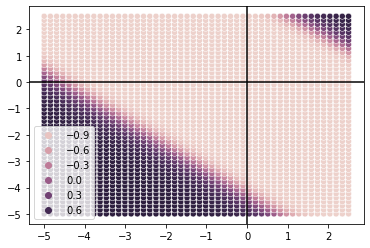

In [46]:
nn_XOR = creer_neural_net(W1=[-0.9, -0.96], b1=-3.4,
                          W2=[-0.91, -1.1], b2=3,
                          W3=[+3.0, -3.0], b3=1.0,
)

frontière_de_décision(nn_XOR)

### Partie 3

### 3.1) La mutliplication matricielle

In [47]:
import torch 
from torch import tensor
n_lignes_A = 50
n_colonnes_A = 28*28
n_lignes_B = 28*28
n_colonnes_B = 10
A = torch.randn(n_lignes_A, n_colonnes_A)
B = torch.randn(n_lignes_B, n_colonnes_B)

In [48]:
def matmul_python(M1, M2): 
    # extraction de ligne et de colonne
    m1_ligne, m1_coln = M1.shape
    m2_ligne, m2_coln = M2.shape
    
    assert m1_coln == m2_ligne 
    
    ## Creation d'une matrice
    M3 = torch.zeros(m1_ligne,m2_coln)
    
    # Remplissage de la matrice M3 
    for i in range(m1_ligne): 
        for j in range(m2_coln):
            for k in range(m1_coln):
                M3[i,j] +=M1[i,k] * M2[k,j]
                
    return M3